In [1]:
import numpy as np
import os
import warnings
import pandas as pd
import scipy.interpolate as scintrp
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import foamDataHandler as foam
import windLoadCaseProcessors as wProc
import windPlotters as wPlt
import windBasics as wind

# Case handling

In [2]:
# caseDir = 'D:/tempData_depot/simData_CandC/ttuMSop0900.4/'
# probeName = 'probes.V1'
# targetProfile = caseDir+"blwtProfiles_O15.csv"

# les,wt = foam.processVelProfile(caseDir,probeName,targetProfile)


In [3]:
# les.writeToFile("D:/tempData_depot/simData_CandC/ttuMSop0900.4","test",writeTH=True)



# Inflow handling

In [ ]:
caseDir = 'D:/tempData_depot/simData_CandC/ttuPSpcOP15.7/'
tMin = 47
tMax = 47.3
zRef = 0.08
sampleName = 'testRun'

inletDir = caseDir+'constant/boundaryData/inlet/'
outPath = caseDir+'constant/boundaryData/sample_'
figFile = caseDir+'constant/boundaryData/sampleProfiles.pdf'

# foam.extractSampleProfileFromInflow(inletDir, outPath, figFile, tMax, H)
velUn, velSc = foam.scaleInflowData(caseDir,tMin,tMax,zRef,writeInflow=False,smplName=sampleName)


In [17]:
fileDir = 'D:/tempData_depot/simData_CandC/E01v01/constant/'
file = fileDir+'Unscaled_0.0_to_50.0_profiles.csv'
prof = pd.read_csv(file)
zRef = 0.08


file = fileDir+'Unscaled_0.0_to_50.0_U-TH.npy'
U = np.load(file)
file = fileDir+'Unscaled_0.0_to_50.0_V-TH.npy'
V = np.load(file)
file = fileDir+'Unscaled_0.0_to_50.0_W-TH.npy'
W = np.load(file)

dt = 0.000926
velUn = wind.profile(name="Unscaled",Z=prof.Z,dt=dt,Zref=zRef,UofT=U,VofT=V,WofT=W)

file = fileDir+'Scaled_0.0_to_50.0_U-TH.npy'
U = np.load(file)
file = fileDir+'Scaled_0.0_to_50.0_V-TH.npy'
V = np.load(file)
file = fileDir+'Scaled_0.0_to_50.0_W-TH.npy'
W = np.load(file)

dt = 0.002
velSc = wind.profile(name="Scaled",Z=prof.Z,dt=dt,Zref=zRef,UofT=U,VofT=V,WofT=W)

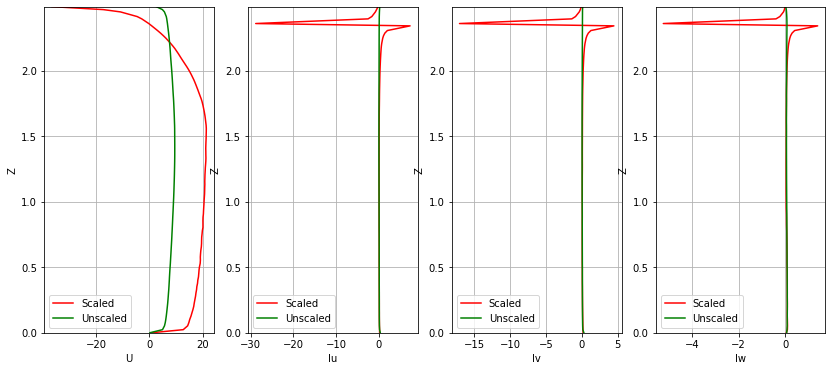

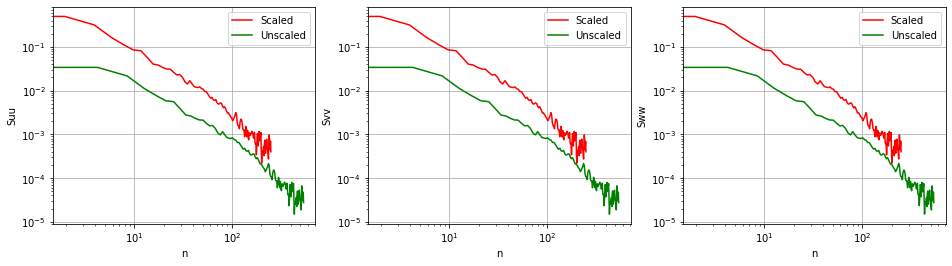

'Scaled'

In [18]:
# np.shape(np.transpose(Vsmpl_in[:,:,0]))  # [N_pts x nTime]

# plt.figure()
# plt.plot(velSc.Iu,velSc.Z)
# plt.plot(velSc.Iv,velSc.Z)
# plt.xlim((0,0.3))
# plt.show()

# from datetime import datetime
# now =datetime.now()
# nowStr = datetime.now().strftime("%Y-%m-%d_%H:%M")
# print(datetime.now().strftime("%Y-%m-%d_%H:%M"))



# velSc.plotProfiles()

allProfs = wind.Profiles((velSc,velUn))
allProfs.plotProfiles()
allProfs.plotSpectra()

allProfs.profiles[0].name

